In [118]:
import matplotlib.pyplot as plt
import pandas as pds
import numpy as np

In [120]:
dat = pds.read_csv('results/real_results2.txt', sep=' ', header=None)

In [121]:
dat.tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11
14,propensity,real_2500,0.289,0.006,-0.096,0.027,306.983,1.218,1.177,0.005,1.364,0.008
15,vsr,real_2500,0.279,0.006,-0.081,0.026,218.167,2.116,1.058,0.005,1.070,0.006
16,tarnet,real_2500,0.163,0.005,-1.806,0.049,328.339,1.485,1.946,0.011,1.787,0.011
17,drcrn,real_2500,0.122,0.005,-1.104,0.047,357.728,1.674,1.783,0.009,1.840,0.011
18,dor,real_3000,0.297,0.009,-0.029,0.035,214.786,2.816,1.065,0.006,1.131,0.007
19,scp,real_3000,0.288,0.009,0.081,0.035,213.649,2.655,1.221,0.006,1.042,0.007
20,propensity,real_3000,0.272,0.009,-0.114,0.035,262.308,1.857,1.311,0.007,1.331,0.009
21,vsr,real_3000,0.269,0.008,-0.103,0.035,217.802,2.619,1.081,0.007,1.144,0.008
22,tarnet,real_3000,0.161,0.006,-1.298,0.065,365.669,2.251,1.958,0.012,1.956,0.015
23,drcrn,real_3000,0.076,0.005,-1.182,0.066,382.961,2.430,1.491,0.009,2.060,0.015


In [122]:
n_sample = [int(x[1]) for x in dat[1].str.split('_')]
dat['level'] = n_sample

In [123]:
dat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,level
0,dor,real_1000,0.234,0.004,-0.115,0.019,321.621,1.038,1.189,0.004,1.383,0.006,1000
1,scp,real_1000,0.286,0.004,-0.006,0.017,221.268,1.367,1.125,0.003,1.098,0.004,1000
2,propensity,real_1000,0.238,0.005,-0.092,0.021,253.046,1.018,1.362,0.003,1.244,0.003,1000
3,vsr,real_1000,0.274,0.004,-0.096,0.018,253.353,1.350,1.180,0.004,1.186,0.004,1000
4,tarnet,real_1000,0.102,0.003,-2.255,0.030,380.762,1.107,1.490,0.005,1.924,0.007,1000


In [124]:
names = [rename_dict[x] for x in dat[0]]

In [125]:
dat['method'] = names

In [126]:
dat['nDCG'] = [f"{x:.3f}"[1:] + ' ({})'.format(str(round(y, 4))[1:]) for x, y in zip(dat[2], dat[3])]

In [127]:
dat['Impv'] = [f"{10*x:.2f}" + ' ({})'.format(f"{10*y:.2f}"[1:]) for x, y in zip(dat[4], dat[5])]

In [128]:
dat['Rank'] = [f"{x:.1f}" + ' ({})'.format(str(round(y, 1))) for x, y in zip(dat[6], dat[7])]

In [129]:
dat['PEHE'] = [f"{x:.3f}" + ' ({})'.format(str(round(y, 4))) for x, y in zip(dat[8], dat[9])]

In [130]:
dat['RMSE'] = [f"{x:.3f}" + ' ({})'.format(str(round(y, 4))) for x, y in zip(dat[10], dat[11])]

In [131]:
df4 = dat.pivot(index='method', columns='level', values='PEHE')
df4

level,1000,1500,2500,3000
method,,,,
CFR,1.490 (0.005),1.896 (0.008),1.946 (0.011),1.958 (0.012)
DR-CRN,1.400 (0.004),1.498 (0.005),1.783 (0.009),1.491 (0.009)
NN,1.189 (0.004),1.091 (0.004),1.094 (0.005),1.065 (0.006)
NN-IPW,1.362 (0.003),1.210 (0.004),1.177 (0.005),1.311 (0.007)
SCP,1.125 (0.003),1.092 (0.003),1.113 (0.004),1.221 (0.006)
VSR,1.180 (0.004),1.127 (0.004),1.058 (0.005),1.081 (0.007)


In [132]:
df5 = dat.pivot(index='method', columns='level', values='RMSE')
df5

level,1000,1500,2500,3000
method,,,,
CFR,1.924 (0.007),1.856 (0.008),1.787 (0.011),1.956 (0.015)
DR-CRN,2.005 (0.008),1.929 (0.008),1.840 (0.011),2.060 (0.015)
NN,1.383 (0.006),1.116 (0.004),1.131 (0.006),1.131 (0.007)
NN-IPW,1.244 (0.003),1.123 (0.004),1.364 (0.008),1.331 (0.009)
SCP,1.098 (0.004),1.044 (0.004),1.007 (0.005),1.042 (0.007)
VSR,1.186 (0.004),1.140 (0.005),1.070 (0.006),1.144 (0.008)


In [113]:
df1 = dat.pivot(index='method', columns='level', values='nDCG')
df1

level,1000,1500,2500,3000
method,,,,
CFR,.102 (.003),.163 (.004),.163 (.005),.161 (.006)
DR-CRN,.059 (.002),.143 (.004),.122 (.005),.076 (.005)
NN,.234 (.004),.255 (.005),.237 (.006),.297 (.009)
NN-IPW,.238 (.005),.300 (.005),.289 (.006),.272 (.009)
SCP,.286 (.004),.299 (.005),.305 (.007),.288 (.009)
VSR,.274 (.004),.268 (.004),.279 (.006),.269 (.008)


In [114]:
df2 = dat.pivot(index='method', columns='level', values='Impv')
df2

level,1000,1500,2500,3000
method,,,,
CFR,-22.55 (.30),-9.84 (.38),-18.06 (.49),-12.98 (.65)
DR-CRN,-10.74 (.31),-10.72 (.35),-11.04 (.47),-11.82 (.66)
NN,-1.15 (.19),-0.96 (.20),-0.95 (.27),-0.29 (.35)
NN-IPW,-0.92 (.21),0.55 (.18),-0.96 (.27),-1.14 (.35)
SCP,-0.06 (.17),0.58 (.18),0.75 (.25),0.81 (.35)
VSR,-0.96 (.18),-0.96 (.20),-0.81 (.26),-1.03 (.35)


In [115]:
df3 = dat.pivot(index='method', columns='level', values='Rank')
df3

level,1000,1500,2500,3000
method,,,,
CFR,380.8 (1.1),335.4 (1.3),328.3 (1.5),365.7 (2.3)
DR-CRN,391.2 (1.1),379.6 (1.4),357.7 (1.7),383.0 (2.4)
NN,321.6 (1.0),228.1 (1.5),232.7 (2.1),214.8 (2.8)
NN-IPW,253.0 (1.0),225.9 (1.4),307.0 (1.2),262.3 (1.9)
SCP,221.3 (1.4),217.9 (1.4),219.5 (1.8),213.6 (2.7)
VSR,253.4 (1.4),233.6 (1.6),218.2 (2.1),217.8 (2.6)


In [85]:
df1.to_csv('real_df1.csv')
df2.to_csv('real_df2.csv')
df3.to_csv('real_df3.csv')

In [133]:
df5.to_csv('real_df5.csv')

In [39]:
df_linear = dat.copy()

df_linear[2] = df_linear[4]
df_linear[3] = df_linear[5]


In [41]:
df_linear = dat.copy()

df_linear[2] = df_linear[6]
df_linear[3] = df_linear[7]


In [43]:
df_linear = dat.copy()


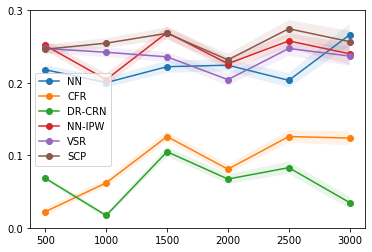

In [44]:
rename_dict = {
        'dor': 'NN', 'tarnet': 'CFR', 'cfrnet': 'CFR', 'propensity': 'NN-IPW', 'vsr': 'VSR', 'scp': 'SCP', 'drcrn': 'DR-CRN'
    }
for method in ['dor', 'tarnet', 'drcrn', 'propensity', 'vsr', 'scp']:
    df_method = df_linear[df_linear[0] == method].copy()


    plt.fill_between(df_method['level'], df_method[2] - 1.6 * df_method[3], df_method[2] + 1.6 * df_method[3], alpha=0.1)
    plt.plot(df_method['level'], df_method[2], '-o', label=rename_dict[method])

#     plt.title(setting_dict[setting], fontsize=18)
    ax = plt.gca()
    ax.set_xticks(np.unique(df_method['level']))


    ymin, ymax = ax.get_ylim()
    custom_ticks = np.linspace(ymin, ymax, 4)
    ax.set_yticks(custom_ticks)
    ax.set_yticklabels(np.round(custom_ticks, 1))
    plt.legend()

In [4]:
settings = ['confounding_level', 'n_flip', 'p_confounder_cause', 'p_cause_cause', 'n_cause', 'n_confounder']

# setting_dict = {
#     'confounding_level': r'Confounding level $\alpha$',
#     'n_flip': r'Treatment distance $\delta$',
#     'p_confounder_cause': r'Treatment-cause Sparsity $p_v$',
#     'p_cause_cause': r'Cause-cause Sparsity $p_u$',
#     'n_cause': r'Number of causes $K$',
#     'n_confounder': r'Number of confounders $D$',
# }

setting_dict = {
    'confounding_level': r'$\alpha$',
    'n_flip': r'$\delta$',
    'p_confounder_cause': r'$p_v$',
    'p_cause_cause': r'$p_u$',
    'n_cause': r'$K$',
    'n_confounder': r'$D$',
}

In [14]:
def make_plot(setting, no_y=False, linear=True):
    df = dat[dat[1].str.contains(setting)].copy()

    tmp = list(df[1].str.split('_'))
    level = [float(x[-2]) for x in tmp]
    lineara = [(x[-1]) for x in tmp]
    df['level'] = level
    df['linear'] = lineara
    if linear:
        df_linear = df[df.linear == 'linear'].copy()
    else:
        df_linear = df[df.linear == 'nonlinear'].copy()
    
    rename_dict = {
        'dor': 'NN', 'tarnet': 'CFR', 'cfrnet': 'CFR', 'propensity': 'NN-IPW', 'vsr': 'VSR', 'scp': 'SCP', 'drcrn': 'DR-CRN'
    }
    for method in ['dor', 'tarnet', 'drcrn', 'propensity', 'vsr', 'scp']:
        df_method = df_linear[df_linear[0] == method].copy()
        
        if linear:
            df_method = df_method[df_method[2]<1.3]
        else:
            df_method = df_method[df_method[2]<0.19]
    
#         plt.locator_params(axis='y', nbins=5)

        plt.fill_between(df_method['level'], df_method[2] - 1.6 * df_method[3], df_method[2] + 1.6 * df_method[3], alpha=0.1)
        plt.plot(df_method['level'], df_method[2], '-o', label=rename_dict[method])
        
#         plt.ylim(0,1)
#         plt.ylim(0,0.18)
        plt.title(setting_dict[setting], fontsize=18)
        ax = plt.gca()
        ax.set_xticks(np.unique(df_method['level']))
        
        
        ymin, ymax = ax.get_ylim()
        custom_ticks = np.linspace(ymin, ymax, 4)
        ax.set_yticks(custom_ticks)
        ax.set_yticklabels(np.round(custom_ticks, 1))

        if no_y:
#             ax.set_yticks([])
            pass
        else:
            plt.ylabel('Root PEHE', fontsize=18)


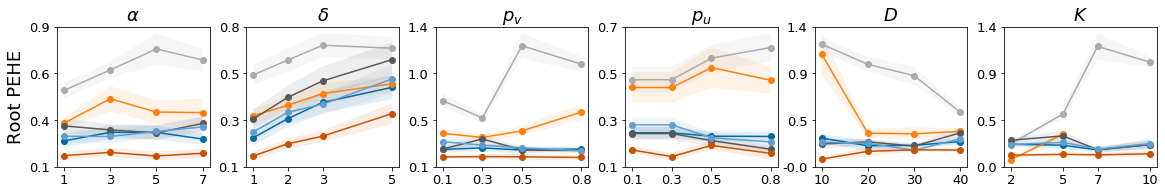

In [22]:
plt.figure(figsize=(16,2.5))
plt.style.use('tableau-colorblind10')
plt.rcParams['font.size'] = '13'

plt.subplot(161)
make_plot(settings[0])

plt.subplot(162)
make_plot(settings[1], no_y=True)


plt.subplot(163)
make_plot(settings[2], no_y=True)

plt.subplot(164)
make_plot(settings[3], no_y=True)

plt.subplot(165)
make_plot(settings[5], no_y=True)


plt.subplot(166)
make_plot(settings[4], no_y=True)


# plt.legend(fontsize=11)
plt.tight_layout(pad=0)

plt.savefig(fname='linear_tight.png')

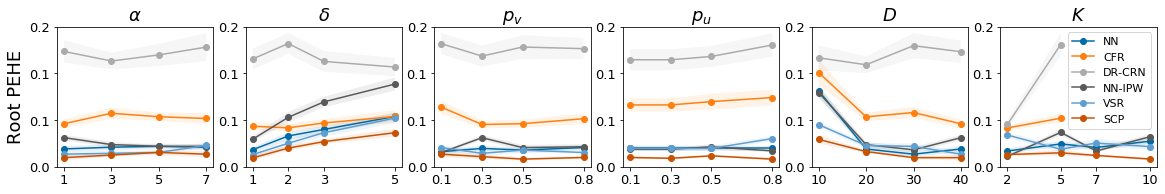

In [23]:
plt.figure(figsize=(16,2.5))
plt.style.use('tableau-colorblind10')
plt.rcParams['font.size'] = '13'

plt.subplot(161)
make_plot(settings[0], linear=False)

plt.subplot(162)
make_plot(settings[1], no_y=True, linear=False)


plt.subplot(163)
make_plot(settings[2], no_y=True, linear=False)

plt.subplot(164)
make_plot(settings[3], no_y=True, linear=False)

plt.subplot(165)
make_plot(settings[5], no_y=True, linear=False)


plt.subplot(166)
make_plot(settings[4], no_y=True, linear=False)


plt.legend(fontsize=11)
plt.tight_layout(pad=0)

plt.savefig(fname='nonlinear_tight.png')

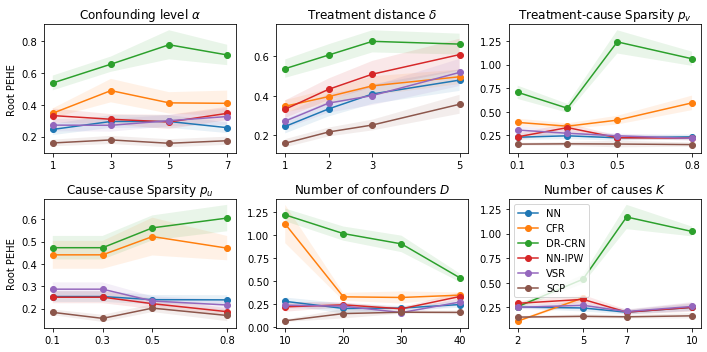

In [196]:
plt.figure(figsize=(10,5))

plt.subplot(231)
make_plot(settings[0])

plt.subplot(232)
make_plot(settings[1], no_y=True)


plt.subplot(233)
make_plot(settings[2], no_y=True)

plt.subplot(234)
make_plot(settings[3])

plt.subplot(235)
make_plot(settings[5], no_y=True)


plt.subplot(236)
make_plot(settings[4], no_y=True)

plt.legend()
plt.tight_layout()

# plt.savefig(fname='nonlinear.png')

In [94]:
setting = settings[0]

In [95]:
df = dat[dat[1].str.contains(setting)].copy()

tmp = list(df[1].str.split('_'))
level = [float(x[-2]) for x in tmp]
linear = [(x[-1]) for x in tmp]
df['level'] = level
df['linear'] = linear
df_linear = df[df.linear == 'linear'].copy()

In [96]:
rename_dict = {
    'dor': 'NN', 'tarnet': 'CFRNET', 'cfrnet': 'CFRNET', 'propensity': 'NN-IPW', 'vsr': 'VSR', 'scp': 'SCP'
}

Text(0.5, 0, '$\\alpha > \\beta$')

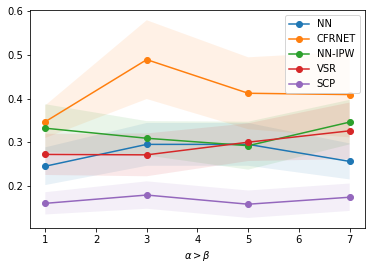

In [99]:
for method in ['dor', 'tarnet', 'propensity', 'vsr', 'scp']:
    df_method = df_linear[df_linear[0] == method].copy()
    df_method = df_method[df_method[2]<1.3]
    plt.fill_between(df_method['level'], df_method[2] - 1.96 * df_method[3], df_method[2] + 1.96 * df_method[3], alpha=0.1)
    plt.plot(df_method['level'], df_method[2], '-o', label=rename_dict[method])

plt.legend()

plt.xlabel(r'$\alpha > \beta$')

In [25]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']
